In [ ]:
# 기본
import gc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
# 그래프 설정
sns.set()
import pyarrow.parquet as pq

Train과 Test 데이터 합치기(여기서는 각 월별로 코드 돌렸는데 마지막이 12월이므로 all_df12)

In [ ]:
# parquet 파일 데이터를 읽어온다.
train_df12 = pd.read_parquet('/content/drive/MyDrive/data/train/3.승인매출정보/201812_train_승인매출정보.parquet')
# parquet 파일 데이터를 읽어온다.
test_df12 = pd.read_parquet('/content/drive/MyDrive/data/test/3.승인매출정보/201812_test_승인매출정보.parquet')
# 데이터를 합친다.
all_df12 = pd.concat([train_df12, test_df12])
all_df12.reset_index(inplace=True, drop=True)

각 월별 Train데이터에서 이상치 있는 칼럼 선택해서 개수 구하기

In [ ]:
# 저장 경로 지정
save_dir = '/content/drive/MyDrive/output_outliers'
os.makedirs(save_dir, exist_ok=True)

# 기준이 될 파일에서 컬럼 리스트 추출 (0~199번까지)
sample_file = '/content/drive/MyDrive/data/train/3.승인매출정보/201807_train_승인매출정보.parquet'
all_columns = pq.ParquetFile(sample_file).schema.names
selected_columns = all_columns[0:200]

# 이상치 계산 함수 (int64만)
def calculate_int64_outliers(df):
    int64_cols = df.select_dtypes(include=['int64']).columns
    outlier_counts = {}

    for col in int64_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        outlier_count = ((df[col] < lower) | (df[col] > upper)).sum()
        outlier_counts[col] = outlier_count

    return outlier_counts

# 월별 반복 처리: 201807 ~ 201812
for month in range(7, 13):
    ym = f'2018{month:02d}'

    train_path = f'/content/drive/MyDrive/data/train/3.승인매출정보/{ym}_train_승인매출정보.parquet'
    test_path = f'/content/drive/MyDrive/data/test/3.승인매출정보/{ym}_test_승인매출정보.parquet'

    # 필요한 컬럼만 로드
    train_df = pd.read_parquet(train_path, columns=selected_columns)
    test_df = pd.read_parquet(test_path, columns=selected_columns)
    all_df = pd.concat([train_df, test_df], ignore_index=True)

    # int64 컬럼 기준 이상치 개수 계산
    outlier_dict = calculate_int64_outliers(all_df)

    # 전체 200개 중 int64 컬럼만 채우고 나머지는 0
    outlier_list = []
    for col in selected_columns:
        if col in outlier_dict:
            outlier_list.append(outlier_dict[col])
        else:
            outlier_list.append(0)

    # 1행짜리 DF로 저장
    outlier_df = pd.DataFrame([outlier_list], columns=selected_columns)
    file_path = os.path.join(save_dir, f'{ym}_int64_outlier_counts.xlsx')
    outlier_df.to_excel(file_path, index=False)

    print(f"{ym} 완료 ✅ → {file_path}")

201807 완료 ✅ → /content/drive/MyDrive/output_outliers/201807_int64_outlier_counts.xlsx
201808 완료 ✅ → /content/drive/MyDrive/output_outliers/201808_int64_outlier_counts.xlsx
201809 완료 ✅ → /content/drive/MyDrive/output_outliers/201809_int64_outlier_counts.xlsx
201810 완료 ✅ → /content/drive/MyDrive/output_outliers/201810_int64_outlier_counts.xlsx
201811 완료 ✅ → /content/drive/MyDrive/output_outliers/201811_int64_outlier_counts.xlsx
201812 완료 ✅ → /content/drive/MyDrive/output_outliers/201812_int64_outlier_counts.xlsx


박스플롯을 통해 이상치 존재하는 칼럼의 경우 이상치인지 극단치인지 확인하기(여기서는 각 월별로 코드 돌렸는데 마지막이 12월이므로 all_df12)

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52572 (\N{HANGUL SYLLABLE COE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/l

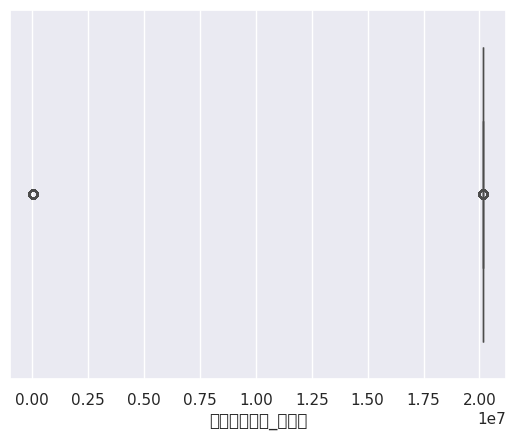

In [ ]:
sns.boxplot(data=all_df12, x='최종이용일자_일시불')
plt.show()

각 월별 Test&Train merged 한 데이터 예시값 구하기(여기서는 각 월별로 코드 돌렸는데 마지막이 12월이므로 all_df12)

In [ ]:
# 예시값 하나 말고 다양하게 뽑는 코드

# 1~200번째 컬럼만 선택 (index 0~199)
subset = all_df12.iloc[:, 0:200]

# 각 컬럼에서 첫 번째 비결측값(NaN이 아닌 값)을 예시값으로 추출
example_values = subset.apply(lambda col: col.dropna().iloc[0] if col.dropna().shape[0] > 0 else None)

# 1행짜리 데이터프레임으로 변환
example_df = pd.DataFrame([example_values.values], columns=example_values.index)

# 엑셀 파일로 저장
example_df.to_excel('all_df12_column_examples.xlsx', index=False)

예시값 확인하기

In [ ]:
# 각 칼럼별 예시값 파악하는 코드
subset = all_df12.iloc[1, 0:20]
row_df = subset.to_frame().T
# CSV 파일로 저장
#row_df.to_csv('all_df12_row1_col1to200.csv', index=False)

In [ ]:
display(subset)

,1
기준년월,201812
ID,TRAIN_000001
최종이용일자_기본,20181214
최종이용일자_신판,20181214
최종이용일자_CA,20170728
최종이용일자_카드론,20170327
최종이용일자_체크,10101
최종이용일자_일시불,20181214
최종이용일자_할부,20171231
이용건수_신용_B0M,9


각 월별 병합데이터 결측치 개수 계산하기(위의 예시값이 0인 경우 파악하기 위함)

In [ ]:
# 칼럼별 값의 예시 칸을 작성하기 위한 코드
unique_values = all_df12['_2순위납부업종'].unique()
print(unique_values)

['납부기타' None '통신비' '보험료' '가스/전기료' '관리비']


각 월별 데이터 결측치 개수 구하기

In [ ]:
# 1~200번째 컬럼 (0~199 인덱스)
subset = all_df12.iloc[:, 0:200]

# 각 컬럼별 결측치 개수 계산
na_counts = subset.isna().sum()

# 숫자만 리스트로 추출
na_list = na_counts.values.tolist()

# 리스트를 1행짜리 DataFrame으로 변환
na_df = pd.DataFrame([na_list])

# 엑셀 파일로 저장
na_df.to_excel('na_counts_1to212.xlsx', index=False, header=False)

각 월별 데이터 데이터타입 구하기

In [ ]:
# 데이터 타입 확인하는 코드
# 1~200번째 컬럼만 추출 (index 0~199)
subset = all_df12.iloc[:, 0:200]

# 각 컬럼의 데이터 타입 확인
dtypes = subset.dtypes

# 시리즈 → 데이터프레임으로 변환
dtypes_df = dtypes.reset_index()
dtypes_df.columns = ['Column_Name', 'Data_Type']  # 컬럼명 지정

# 엑셀 파일로 저장
dtypes_df.to_excel('all_df12_column_dtypes_1to200.xlsx', index=False)

데이터 타입이 연속형인지 범주형인지 구하기

In [ ]:
# 범주형인지, 연속형인지 파악하는 코드
# 1~200번째 컬럼 추출
subset = all_df12.iloc[:, 0:200]

# 데이터 타입 추출
dtypes = subset.dtypes

# 간단한 연속형/범주형 분류 함수
def classify_var_type(dtype):
    if pd.api.types.is_numeric_dtype(dtype):
        return '연속형'
    else:
        return '범주형'

# 분류 적용
var_types = dtypes.apply(classify_var_type)

# DataFrame으로 정리
var_type_df = pd.DataFrame({
    'Column_Name': dtypes.index,
    'Variable_Type': var_types.values
})

# 엑셀로 저장
var_type_df.to_excel('all_df12_var_type_1to200.xlsx', index=False)